# Time series: example

In [4]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
# data source:
# https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD

In [5]:
data = pd.read_csv('~/Documents/GitHub/piepy/data/FremontBridge.csv', index_col='Date', parse_dates=True)
data.head()

/var/folders/b8/rdzjn7jd31b_t6_3txd77stm0000gn/T/ipykernel_63394/3747182117.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data = pd.read_csv('~/Documents/GitHub/piepy/data/FremontBridge.csv', index_col='Date', parse_dates=True)


,"Fremont Bridge Sidewalks, south of N 34th St Total","Fremont Bridge Sidewalks, south of N 34th St Cyclist West Sidewalk","Fremont Bridge Sidewalks, south of N 34th St Cyclist East Sidewalk"
Date,,,
2012-10-02 13:00:00,55.0,7.0,48.0
2012-10-02 14:00:00,130.0,55.0,75.0
2012-10-02 15:00:00,152.0,81.0,71.0
2012-10-02 16:00:00,278.0,167.0,111.0
2012-10-02 17:00:00,563.0,393.0,170.0


In [6]:
data.columns

Index(['Fremont Bridge Sidewalks, south of N 34th St Total',
       'Fremont Bridge Sidewalks, south of N 34th St Cyclist West Sidewalk',
       'Fremont Bridge Sidewalks, south of N 34th St Cyclist East Sidewalk'],
      dtype='object')

In [7]:
# try to change the colnames
data.columns = ['Total', 'West', 'East']

In [9]:
data.shape # 107352 rows

(107352, 3)

In [10]:
data.tail(5)

,Total,West,East
Date,,,
2024-12-31 19:00:00,38.0,14.0,24.0
2024-12-31 20:00:00,18.0,9.0,9.0
2024-12-31 21:00:00,29.0,13.0,16.0
2024-12-31 22:00:00,19.0,11.0,8.0
2024-12-31 23:00:00,31.0,9.0,22.0


Text(0, 0.5, 'Hourly bicycle count')

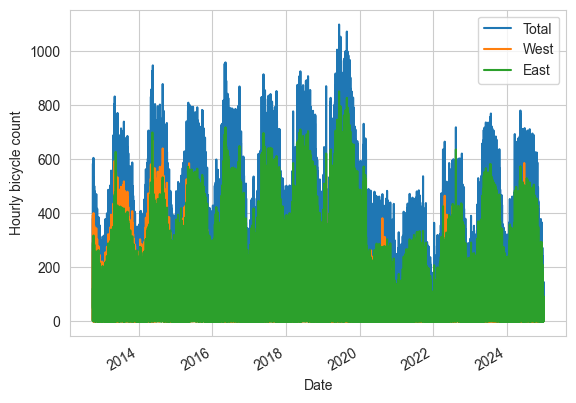

In [11]:
data.plot()
plt.ylabel('Hourly bicycle count')

## Resample

In [12]:
weekly = data.resample('W').sum()
weekly.head()

,Total,West,East
Date,,,
2012-10-07,16230.0,8160.0,8070.0
2012-10-14,16795.0,8116.0,8679.0
2012-10-21,15509.0,7563.0,7946.0
2012-10-28,13437.0,6536.0,6901.0
2012-11-04,12194.0,5786.0,6408.0


<Axes: xlabel='Date'>

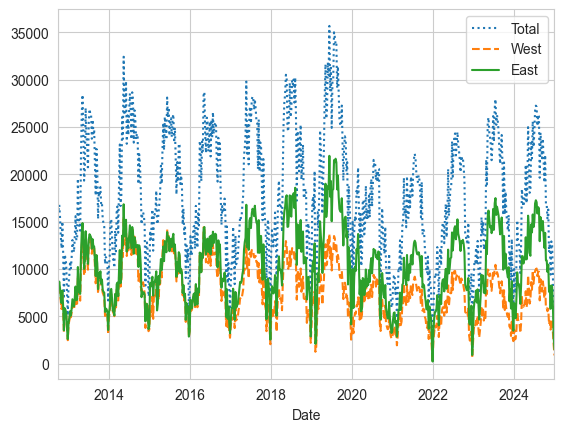

In [13]:
weekly.plot(style = [':', '--', '-'])

In [15]:
# what about monthly?
monthly = data.resample('ME').sum()
monthly.head()

,Total,West,East
Date,,,
2012-10-31,67633.0,33096.0,34537.0
2012-11-30,50647.0,24585.0,26062.0
2012-12-31,36369.0,17761.0,18608.0
2013-01-31,44884.0,21974.0,22910.0
2013-02-28,50027.0,24129.0,25898.0


In [17]:
# yearly?
yearly = data.resample('YE').sum()
yearly.head()

,Total,West,East
Date,,,
2012-12-31,154649.0,75442.0,79207.0
2013-12-31,928279.0,449288.0,478991.0
2014-12-31,1006196.0,490870.0,515326.0
2015-12-31,986502.0,481631.0,504871.0
2016-12-31,982470.0,468304.0,514166.0


<Axes: xlabel='Date'>

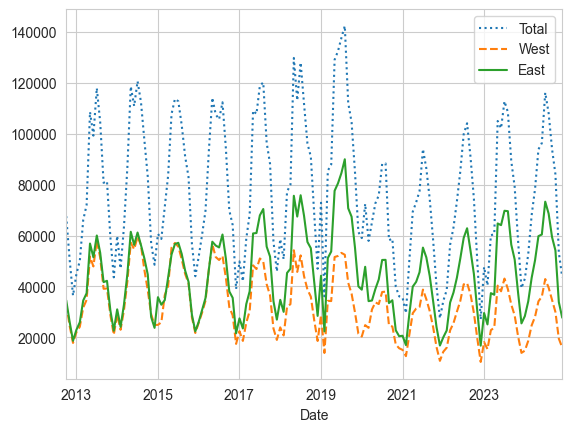

In [18]:
monthly.plot(style = [':', '--', '-'])

<Axes: xlabel='Date'>

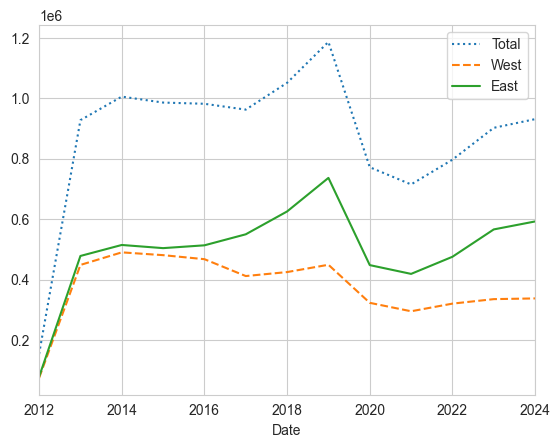

In [19]:
# yearly trend
yearly.plot(style = [':', '--', '-'])

# Aggregation and grouping

In [45]:
# check average traffic as function of time of the day
print(data.index[0])
print(data.index.date[0]) # date
print(data.index.time[0]) # hour
print(data.index.month[0]) # month
print(data.index.dayofweek[0])

2012-10-02 13:00:00
2012-10-02
13:00:00
10
1


## Hourly average

In [24]:
by_time = data.groupby(data.index.time).mean() # this gives 24 by 3
by_time.head()

,Total,West,East
00:00:00,10.187835,4.430903,5.756932
01:00:00,5.487030,2.477862,3.009168
02:00:00,3.620628,1.606502,2.014126
03:00:00,2.638193,1.217800,1.420394
04:00:00,6.120081,2.726521,3.393560


In [43]:
hourly_ticks = 3*60*60*np.arange(8) # these are seconds; 4*60*60*np.arange(6) gives ticks for every 4 hours
hourly_ticks

array([    0, 10800, 21600, 32400, 43200, 54000, 64800, 75600])

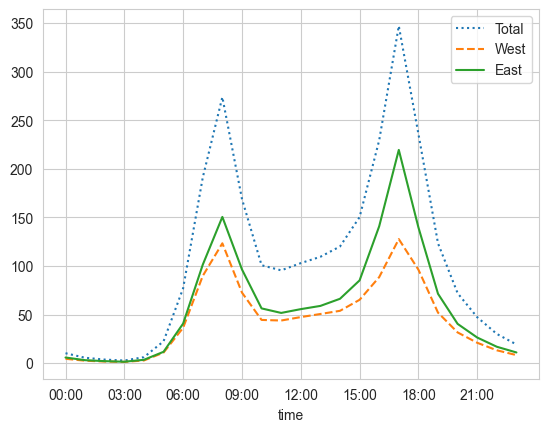

In [44]:
by_time.plot(xticks=hourly_ticks, style=[':', '--', '-']); #

## Weekday average

In [47]:
by_day = data.groupby(data.index.dayofweek).mean()
by_day

,Total,West,East
Date,,,
0,115.805677,48.884698,66.920979
1,129.596296,53.851497,75.744799
2,129.243023,54.068401,75.174622
3,123.066249,51.351656,71.714593
4,108.985848,46.527325,62.458524
5,70.039710,32.286907,37.752804
6,65.519773,30.614004,34.905769


<Axes: >

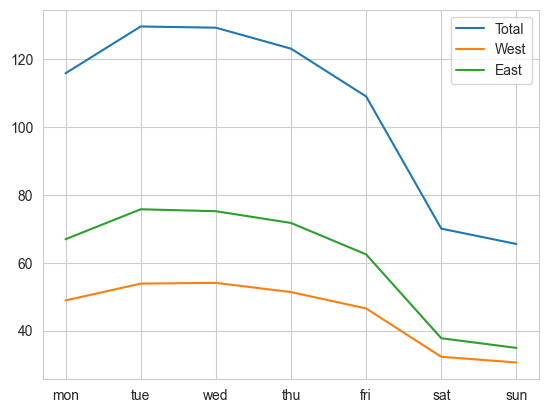

In [51]:
# by_day.plot(xticks = ['mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'sun']) # this does not work
by_day.index = ['mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'sun']
by_day.plot()

## Separate weekday and hourly effects

In [52]:
weekend = np.where(data.index.weekday < 5, 'weekday', 'weekend')
weekend

array(['weekday', 'weekday', 'weekday', ..., 'weekday', 'weekday',
       'weekday'], dtype='<U7')

In [53]:
# group by time: two factors
# 48 rows: 24 for weekday, 24 for weekend
by_time = data.groupby([weekend, data.index.time]).mean()
by_time

Total        West        East
weekday 00:00:00    8.234189    3.548528    4.685661
        01:00:00    4.127426    1.839073    2.288353
        02:00:00    2.788666    1.188165    1.600501
        03:00:00    2.411083    1.166249    1.244834
        04:00:00    7.174389    3.260488    3.913901
        05:00:00   28.608641   13.858485   14.750157
        06:00:00  101.234502   47.999374   53.235128
        07:00:00  254.594552  119.891359  134.703193
        08:00:00  359.535066  161.687226  197.847840
        09:00:00  202.684309   85.631068  117.053241
        10:00:00   97.737238   42.119950   55.617288
        11:00:00   80.470257   36.528178   43.942079
        12:00:00   85.299624   38.899186   46.400438
        13:00:00   91.136506   41.525986   49.610520
        14:00:00  104.055712   45.083568   58.972144
        15:00:00  147.979656   61.633177   86.346479
        16:00:00  264.202817   97.199374  167.003443
        17:00:00  439.341158  157.022848  282.318310
        18:00:00  294.617214  118.062285  176.554930
        19:00:00  146.533646   61.194053   85.339593
        20:00:00   83.341471   36.293271   47.048200
        21:00:00   52.617214   23.701095   28.916119
        22:00:00   33.099218   14.434116   18.665102
        23:00:00   20.241941    8.693584   11.548357
weekend 00:00:00   15.070423    6.636150    8.434272
        01:00:00    8.884977    4.074335    4.810642
        02:00:00    5.719589    2.661927    3.057662
        03:00:00    3.205790    1.346635    1.859155
        04:00:00    3.485133    1.392019    2.093114
        05:00:00    6.977308    3.139280    3.838028
        06:00:00   16.790297    7.369327    9.420970
        07:00:00   32.034429   14.398279   17.636150
        08:00:00   59.625196   27.478873   32.146322
        09:00:00   84.943662   40.004695   44.938967
        10:00:00  108.298905   50.249609   58.049296
        11:00:00  133.021127   62.077465   70.943662
        12:00:00  146.978873   68.539906   78.438967
        13:00:00  155.166667   73.125978   82.040689
        14:00:00  159.990610   75.676056   84.314554
        15:00:00  156.146322   73.989045   82.157277
        16:00:00  142.338028   66.823944   75.514085
        17:00:00  116.544601   54.197183   62.347418
        18:00:00   89.411581   41.541471   47.870110
        19:00:00   65.181534   28.775430   36.406103
        20:00:00   43.519562   19.809077   23.710485
        21:00:00   33.850548   13.995305   19.855243
        22:00:00   22.349765   10.097809   12.251956
        23:00:00   16.617371    7.148670    9.468701

In [54]:
by_time.shape # note that the shape is still 3 columns - probably sns facets would be problematic

(48, 3)

<Axes: title={'center': 'weekday'}, xlabel='time'>

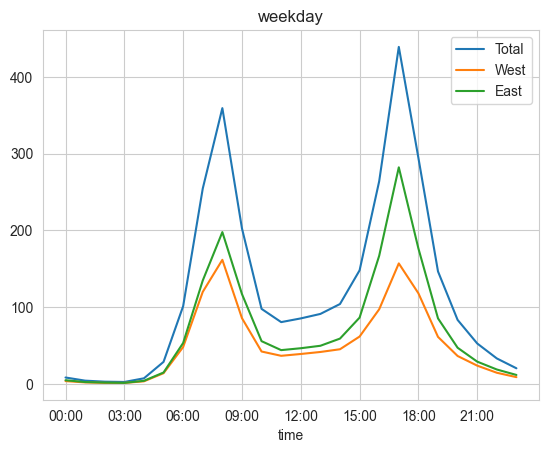

In [56]:
# do indexing with ix
by_time.loc['weekday'].plot(title = 'weekday', xticks = hourly_ticks)

<Axes: title={'center': 'weekday'}, xlabel='time'>

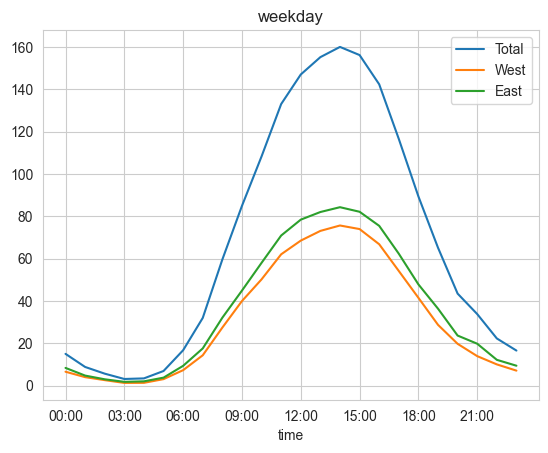

In [57]:
by_time.loc['weekend'].plot(title = 'weekday', xticks = hourly_ticks)


# Prediction with regression

In [60]:
# url = 'https://raw.githubusercontent.com/jakevdp/bicycle-data/main'
# !curl -O {url}/FremontBridge.csv
# !curl -O {url}/SeattleWeather.csv

In [61]:
counts = pd.read_csv('~/Documents/GitHub/piepy/data/FremontBridge.csv',
                     index_col='Date', parse_dates=True)
weather = pd.read_csv('~/Documents/GitHub/piepy/data/SeattleWeather.csv',
                      index_col='DATE', parse_dates=True)

/var/folders/b8/rdzjn7jd31b_t6_3txd77stm0000gn/T/ipykernel_63394/635347054.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  counts = pd.read_csv('~/Documents/GitHub/piepy/data/FremontBridge.csv',


In [62]:
weather.head()

,STATION,NAME,AWND,FMTM,PGTM,PRCP,SNOW,SNWD,TAVG,TMAX,...,WT04,WT05,WT08,WT09,WT13,WT14,WT16,WT17,WT18,WT22
DATE,,,,,,,,,,,,,,,,,,,,,
2012-01-01,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",10.51,NaN,NaN,0.00,0.0,0.0,NaN,55,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
2012-01-02,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",10.07,NaN,NaN,0.43,0.0,0.0,NaN,51,...,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN
2012-01-03,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",5.14,NaN,NaN,0.03,0.0,0.0,NaN,53,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
2012-01-04,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",10.51,NaN,NaN,0.80,0.0,0.0,NaN,54,...,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN
2012-01-05,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",13.65,NaN,NaN,0.05,0.0,0.0,NaN,48,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN


In [64]:
weather.tail() # up to 2021

,STATION,NAME,AWND,FMTM,PGTM,PRCP,SNOW,SNWD,TAVG,TMAX,...,WT04,WT05,WT08,WT09,WT13,WT14,WT16,WT17,WT18,WT22
DATE,,,,,,,,,,,,,,,,,,,,,
2021-12-27,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",9.62,NaN,NaN,0.03,0.5,3.1,20.0,27,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-12-28,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",8.50,NaN,NaN,NaN,1.0,2.0,25.0,28,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-12-29,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",8.50,NaN,NaN,0.13,0.9,2.0,26.0,29,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-12-30,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",9.62,NaN,NaN,NaN,3.4,3.1,30.0,34,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-12-31,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",6.71,NaN,NaN,0.00,0.0,3.9,29.0,31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [65]:
counts.tail()

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2021-12-31 19:00:00,0.0,0.0,0.0
2021-12-31 20:00:00,0.0,0.0,0.0
2021-12-31 21:00:00,0.0,0.0,0.0
2021-12-31 22:00:00,0.0,0.0,0.0
2021-12-31 23:00:00,0.0,0.0,0.0


In [67]:
# data before 2020
counts = counts[counts.index < '2020-01-01']
weather = weather[weather.index < '2020-01-01']

In [68]:
# aggregate the daily bicycle traffic
daily = counts.resample('d').sum()
daily.head()

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2012-10-03,7042.0,3520.0,3522.0
2012-10-04,6950.0,3416.0,3534.0
2012-10-05,6296.0,3116.0,3180.0
2012-10-06,4012.0,2160.0,1852.0
2012-10-07,4284.0,2382.0,1902.0


In [70]:
daily.columns = ['Total', 'West', 'East']

In [72]:
# only take this one column
daily = daily[['Total']]

In [73]:
daily

,Total
Date,
2012-10-03,7042.0
2012-10-04,6950.0
2012-10-05,6296.0
2012-10-06,4012.0
2012-10-07,4284.0
...,...
2019-12-27,2276.0
2019-12-28,1676.0
2019-12-29,1846.0


In [75]:
daily['weekday'] = daily.index.dayofweek

In [76]:
daily

,Total,weekday
Date,,
2012-10-03,7042.0,2
2012-10-04,6950.0,3
2012-10-05,6296.0,4
2012-10-06,4012.0,5
2012-10-07,4284.0,6
...,...,...
2019-12-27,2276.0,4
2019-12-28,1676.0,5
2019-12-29,1846.0,6


In [77]:
# this is creating the wide format data, with dummy weekdays
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
for i in range(7):
    daily[days[i]] = (daily.index.dayofweek == i).astype(float)

In [78]:
daily

,Total,weekday,Mon,Tue,Wed,Thu,Fri,Sat,Sun
Date,,,,,,,,,
2012-10-03,7042.0,2,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2012-10-04,6950.0,3,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2012-10-05,6296.0,4,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2012-10-06,4012.0,5,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2012-10-07,4284.0,6,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
2019-12-27,2276.0,4,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2019-12-28,1676.0,5,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2019-12-29,1846.0,6,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## add holiday information

In [79]:
from pandas.tseries.holiday import USFederalHolidayCalendar
cal = USFederalHolidayCalendar()
holidays = cal.holidays('2012', '2020')

In [80]:
holidays

DatetimeIndex(['2012-01-02', '2012-01-16', '2012-02-20', '2012-05-28',
               '2012-07-04', '2012-09-03', '2012-10-08', '2012-11-12',
               '2012-11-22', '2012-12-25', '2013-01-01', '2013-01-21',
               '2013-02-18', '2013-05-27', '2013-07-04', '2013-09-02',
               '2013-10-14', '2013-11-11', '2013-11-28', '2013-12-25',
               '2014-01-01', '2014-01-20', '2014-02-17', '2014-05-26',
               '2014-07-04', '2014-09-01', '2014-10-13', '2014-11-11',
               '2014-11-27', '2014-12-25', '2015-01-01', '2015-01-19',
               '2015-02-16', '2015-05-25', '2015-07-03', '2015-09-07',
               '2015-10-12', '2015-11-11', '2015-11-26', '2015-12-25',
               '2016-01-01', '2016-01-18', '2016-02-15', '2016-05-30',
               '2016-07-04', '2016-09-05', '2016-10-10', '2016-11-11',
               '2016-11-24', '2016-12-26', '2017-01-02', '2017-01-16',
               '2017-02-20', '2017-05-29', '2017-07-04', '2017-09-04',
      

In [81]:
# join the daily counts
# this creates a column with 1 for the dates that match, but NaN otherwise
daily = daily.join(pd.Series(1, index=holidays, name = 'holiday'))

In [90]:
daily[0:5]

,Total,weekday,Mon,Tue,Wed,Thu,Fri,Sat,Sun,holiday
Date,,,,,,,,,,
2012-10-03,7042.0,2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
2012-10-04,6950.0,3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
2012-10-05,6296.0,4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
2012-10-06,4012.0,5,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
2012-10-07,4284.0,6,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0


In [89]:
# impute the NaN as 0
# daily['holiday'] = daily['holiday'].fillna(0, inplace = True)
daily.fillna({'holiday': 0}, inplace = True)

/var/folders/b8/rdzjn7jd31b_t6_3txd77stm0000gn/T/ipykernel_63394/3724580982.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  daily.fillna({'holiday': 0}, inplace = True)


## weather data

In [93]:
weather.head()

,STATION,NAME,AWND,FMTM,PGTM,PRCP,SNOW,SNWD,TAVG,TMAX,...,WT04,WT05,WT08,WT09,WT13,WT14,WT16,WT17,WT18,WT22
DATE,,,,,,,,,,,,,,,,,,,,,
2012-01-01,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",10.51,NaN,NaN,0.00,0.0,0.0,NaN,55,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
2012-01-02,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",10.07,NaN,NaN,0.43,0.0,0.0,NaN,51,...,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN
2012-01-03,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",5.14,NaN,NaN,0.03,0.0,0.0,NaN,53,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
2012-01-04,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",10.51,NaN,NaN,0.80,0.0,0.0,NaN,54,...,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN
2012-01-05,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",13.65,NaN,NaN,0.05,0.0,0.0,NaN,48,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN


In [94]:
# temperatures are in 1/10 deg C; convert to C
weather['TMIN'] /= 10
weather['TMAX'] /= 10
weather['Temp (C)'] = 0.5 * (weather['TMIN'] + weather['TMAX'])

# precip is in 1/10 mm; convert to inches
weather['PRCP'] /= 254
weather['dry day'] = (weather['PRCP'] == 0).astype(int)

daily = daily.join(weather[['PRCP', 'Temp (C)', 'dry day']])

In [98]:
daily.tail()

,Total,weekday,Mon,Tue,Wed,Thu,Fri,Sat,Sun,holiday,PRCP,Temp (C),dry day,annual
Date,,,,,,,,,,,,,,
2019-12-27,2276.0,4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0.000039,4.10,0,7.235616
2019-12-28,1676.0,5,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0.000000,4.40,1,7.238356
2019-12-29,1846.0,6,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.000039,4.55,0,7.241096
2019-12-30,3606.0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.000157,4.55,0,7.243836
2019-12-31,2284.0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0.001024,4.95,0,7.246575


In [96]:
# this is a daily factor to account for the temporal effect
daily['annual'] = (daily.index - daily.index[0]).days / 365.

# Linear regression

In [100]:
# select relevant columns
column_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun', 'holiday',
                'PRCP', 'dry day', 'Temp (C)', 'annual']
X = daily[column_names]
y = daily['Total']
print(X.head())
print(y.head())


            Mon  Tue  Wed  Thu  Fri  Sat  Sun  holiday  PRCP  dry day  \
Date                                                                    
2012-10-03  0.0  0.0  1.0  0.0  0.0  0.0  0.0        0   0.0        1   
2012-10-04  0.0  0.0  0.0  1.0  0.0  0.0  0.0        0   0.0        1   
2012-10-05  0.0  0.0  0.0  0.0  1.0  0.0  0.0        0   0.0        1   
2012-10-06  0.0  0.0  0.0  0.0  0.0  1.0  0.0        0   0.0        1   
2012-10-07  0.0  0.0  0.0  0.0  0.0  0.0  1.0        0   0.0        1   

            Temp (C)    annual  
Date                            
2012-10-03      5.60  0.000000  
2012-10-04      5.65  0.002740  
2012-10-05      5.95  0.005479  
2012-10-06      6.05  0.008219  
2012-10-07      6.05  0.010959  
Date
2012-10-03    7042.0
2012-10-04    6950.0
2012-10-05    6296.0
2012-10-06    4012.0
2012-10-07    4284.0
Freq: D, Name: Total, dtype: float64


In [101]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=False)
model.fit(X, y)
# attach the predicted value to the daily dataset
daily['predicted'] = model.predict(X)

In [103]:
daily[['Total', 'predicted']].head()

,Total,predicted
Date,,
2012-10-03,7042.0,7079.844786
2012-10-04,6950.0,6840.654724
2012-10-05,6296.0,6592.693645
2012-10-06,4012.0,3969.802101
2012-10-07,4284.0,3787.808083


<Axes: xlabel='Date'>

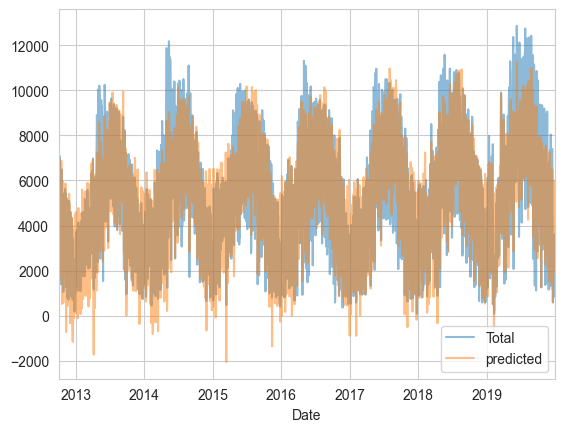

In [104]:
daily[['Total', 'predicted']].plot(alpha = 0.5)

In [106]:
# check the coefficients
print(model.coef_)
params = pd.Series(model.coef_, index = column_names)
print(params)

[-1.67459061e+03 -1.18776634e+03 -1.23221675e+03 -1.53648641e+03
 -2.17269735e+03 -4.92530255e+03 -5.10774211e+03  5.77074388e-10
 -3.94426429e+05  1.07304766e+03  1.29268105e+03  1.62624333e+02]
Mon        -1.674591e+03
Tue        -1.187766e+03
Wed        -1.232217e+03
Thu        -1.536486e+03
Fri        -2.172697e+03
Sat        -4.925303e+03
Sun        -5.107742e+03
holiday     5.770744e-10
PRCP       -3.944264e+05
dry day     1.073048e+03
Temp (C)    1.292681e+03
annual      1.626243e+02
dtype: float64


In [107]:
# create bootstrap samples for uncertainty
from sklearn.utils import resample
np.random.seed(42)
err = np.std([model.fit(*resample(X,y)).coef_ for i in range(100)], 0)

In [108]:
print(pd.DataFrame({
    'effect': params.round(0),
    'error': err.round(0)
}))

            effect    error
Mon        -1675.0    137.0
Tue        -1188.0    133.0
Wed        -1232.0    134.0
Thu        -1536.0    145.0
Fri        -2173.0    140.0
Sat        -4925.0    131.0
Sun        -5108.0    134.0
holiday        0.0      0.0
PRCP     -394426.0  20842.0
dry day     1073.0     55.0
Temp (C)    1293.0     25.0
annual       163.0     12.0
